In [3]:
# Nearest Neighbor item based Collaborative Filtering

In [4]:
"""
Three types of filtering:
1) Collaborative 2) Content Based 3) Hybrid

Most recommendation systems have a mix of collaborative and content-based
"""

'\nThree types of filtering:\n1) Collaborative 2) Content Based 3) Hybrid\n\nMost recommendation systems have a mix of collaborative and content-based\n'

In [5]:
# In collaborative filtering: say there are two users who buy same fold 3 so if person 1 bought buds pro along with fold3 then
# person 2  will get the recommendation to buy buds pro also

In [6]:
# In content based filtering: If person 1 reads the sm

In [7]:
import pandas as pd
import numpy as np

In [8]:
movies_df=pd.read_csv("movies.csv", usecols=['movieId', 'title'], dtype={'movieId':'int32', 'title':'string'})
rating_df=pd.read_csv('ratings.csv', usecols=['userId','movieId','rating'], dtype={'userId':'int32', 'movieId':'int32', 'rating':'float32'})

In [9]:
movies_df.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [10]:
rating_df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [11]:
df=pd.merge(rating_df, movies_df, on='movieId')

In [12]:
df.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


In [13]:
df.isnull().sum()
df.shape

(100836, 4)

In [14]:
# movie_rating_count() finds out how many people have rated each and every movie in this dataset
combine_movie_rating=df.dropna(axis=0, subset=['title'])

In [15]:
# this dataset has no null value hence will use df instead of combine_movie_df
combine_movie_rating.shape

(100836, 4)

In [24]:
# showing how many people have rated each movie; reseting the index; and renameing the column
movie_ratingCount=(combine_movie_rating.groupby(['title'])['rating'].
                   count().
                   reset_index().
                   rename(columns={'rating':'TotalRatingCount'}))

In [26]:
movie_ratingCount.head()

,title,TotalRatingCount
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


In [29]:
# Combining two datasets
rating_totalRatingCount=pd.merge(combine_movie_rating, movie_ratingCount)
rating_totalRatingCount.head()

,userId,movieId,rating,title,TotalRatingCount
0,1,1,4.0,Toy Story (1995),215
1,5,1,4.0,Toy Story (1995),215
2,7,1,4.5,Toy Story (1995),215
3,15,1,2.5,Toy Story (1995),215
4,17,1,4.5,Toy Story (1995),215


In [30]:
# since in this dataset output for the above and this statement is same, so we're just considering the simpiler one yo must know the complex one
#rating_totalRatingCount=combine_movie_rating.merge(movie_ratingCount, left_on='title', right_on='title', how='left')
# left_on means we're considering title for merging same as for right df and; we're giving more importance to combine_movie_rating

In [34]:
pd.set_option('display.float_format', lambda x:'%.3f' % x)   # for showing only till decimal points; (unecessary) &  ununderstandable
print(movie_ratingCount.describe())

       TotalRatingCount
count          9719.000
mean             10.375
std              22.406
min               1.000
25%               1.000
50%               3.000
75%               9.000
max             329.000


In [40]:
popu_threshold=50
rating_popular_movie=rating_totalRatingCount.query('TotalRatingCount>=@popu_threshold')
rating_popular_movie.head()

,userId,movieId,rating,title,TotalRatingCount
0,1,1,4.000,Toy Story (1995),215
1,5,1,4.000,Toy Story (1995),215
2,7,1,4.500,Toy Story (1995),215
3,15,1,2.500,Toy Story (1995),215
4,17,1,4.500,Toy Story (1995),215


In [41]:
rating_popular_movie.shape

(41362, 5)

In [54]:
# First lets create a Pivot table

movie_features_df= rating_popular_movie.pivot_table(index='title', columns='userId', values='rating').fillna(0)

In [43]:
movie_features_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,3.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000
12 Angry Men (1957),0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,...,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2001: A Space Odyssey (1968),0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,...,0.000,0.000,5.000,0.000,0.000,5.000,0.000,3.000,0.000,4.500
28 Days Later (2002),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.500,0.000,5.000
300 (2007),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,...,0.000,0.000,0.000,0.000,3.000,0.000,0.000,5.000,0.000,4.000


## COSINE Similarity

##### We are using the concept of Cosine similary which determines the perceentage of similary between 2 entities on cos of angle between them on graph
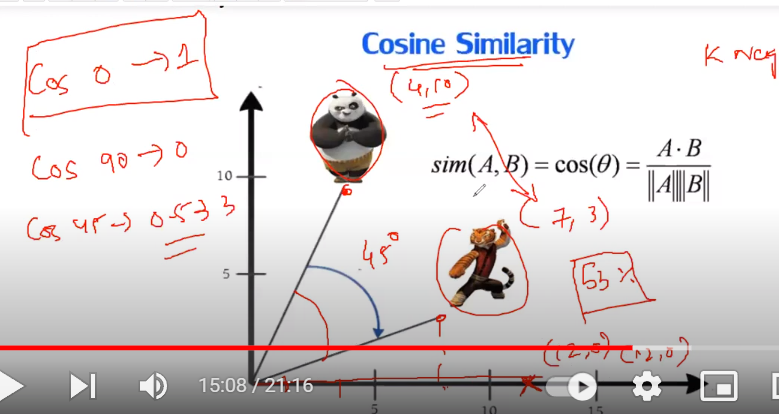

In [56]:
# now converting this to a array matrix
from scipy.sparse import csr_matrix
movie_features_matrix=csr_matrix(movie_features_df.values)    # my pivot table

from sklearn.neighbors import NearestNeighbors    # Unsupervized ML; it's not Classifier or Regressor

model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(movie_features_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [57]:
# We are using knn here as, knn utilizes Euclidean distance but instead of Euclidean distance we'll use cosine of the angle between 2 entitites

In [59]:
movie_features_matrix

<450x606 sparse matrix of type '<class 'numpy.float32'>'
	with 41360 stored elements in Compressed Sparse Row format>

In [63]:
movie_features_df.shape

(450, 606)

In [64]:
movie_features_df.shape[0]

450

In [70]:
query_index=np.random.choice(movie_features_df.shape[0])    # selecting one random record
print(query_index)
distances, indices= model_knn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1,-1), n_neighbors=6)
# .values gives series and .reshape is used to straighten the array

156


In [68]:
movie_features_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,3.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000
12 Angry Men (1957),0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,...,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2001: A Space Odyssey (1968),0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,...,0.000,0.000,5.000,0.000,0.000,5.000,0.000,3.000,0.000,4.500
28 Days Later (2002),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.500,0.000,5.000
300 (2007),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,...,0.000,0.000,0.000,0.000,3.000,0.000,0.000,5.000,0.000,4.000


In [71]:
distances

array([[3.5762787e-07, 3.3566952e-01, 3.8603109e-01, 4.0370262e-01,
        4.0375358e-01, 4.0895212e-01]], dtype=float32)

In [72]:
indices

array([[156,  97, 110, 162,  99, 300]], dtype=int64)

In [73]:
for i in range(0, len(distances.flatten())):   # flatten is used to convert 2d array into 1d array
    if i==0:
        print('Recommended for {0}\n:'.format(movie_features_df.index[query_index]))  # printing our randomly selected movie
    else:
        print('{0}:{1}, with the distance of {2}'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommended for Firm, The (1993)
:
1:Clear and Present Danger (1994), with the distance of 0.33566951751708984
2:Crimson Tide (1995), with the distance of 0.3860310912132263
3:Fugitive, The (1993), with the distance of 0.40370261669158936
4:Client, The (1994), with the distance of 0.4037535786628723
5:Outbreak (1995), with the distance of 0.40895211696624756
